In [34]:
import os
# change directory in order to be able to import python scripts from the common package
if os.getcwd().endswith('jumping'): os.chdir(os.path.expanduser(".."))

In [35]:
import gym
import gym_jumping_task
from gym_jumping_task.envs.jumping_task import JumpTaskEnv
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision.utils import make_grid
import torch.nn as nn
import augmentations
from env import VanillaEnv

In [36]:
device = torch.device('cpu')
env =  VanillaEnv()

Done! Episode Reward:  156.0


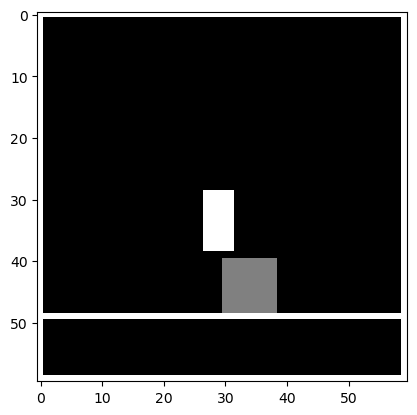

In [37]:
done = False
rewards = []
frames_arr = []

state = env.reset()
step = 0
while not done:
    # action = np.random.randint(low=0, high=2)
    action = 1 if step == 16 else 0 
    next_state, r, done, info = env.step(action)
    rewards.append(r)
    frames_arr.append(np.expand_dims(np.flipud(state.squeeze()), axis=0))
    state = next_state
    step += 1
    if done: 
        print("Done! Episode Reward: ", np.sum(rewards))
        plt.imshow(frames_arr[27].squeeze(), cmap='gray', vmin=0., vmax=1.)
        # plt.savefig('out.pdf')
        break

# Augmentations

In [52]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'

frames = np.array(frames_arr)
#Convert the frame stack into the correct format (B, C, H, W)
if len(frames.shape) == 3: frames = np.expand_dims(frames, axis=1)
frames = torch.from_numpy(frames).to(device)

print(frames.shape)
print(frames.dtype)
print(frames.min(), frames.max())
frames = frames[17:]

torch.Size([56, 1, 60, 60])
torch.float32
tensor(0., device='cuda:0') tensor(1., device='cuda:0')


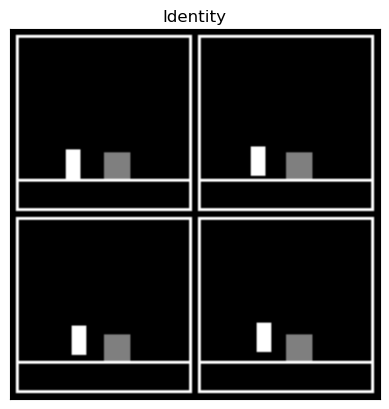

In [53]:
def show_imgs(x, max_display=16, title:str = ""):
    n_cols = 2 if max_display == 4 else 4
    grid = make_grid(x[:max_display],n_cols).permute(1,2,0).cpu().numpy()
    plt.xticks([])
    plt.yticks([])
    plt.imshow(grid)
    if len(title) > 0: plt.title(title)
    plt.show()

show_imgs(frames, title="Identity", max_display=4)

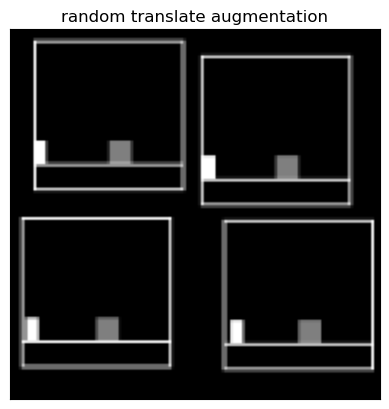

In [40]:
aug_frames = augmentations.random_translate(frames,70)
show_imgs(aug_frames, title="random translate augmentation", max_display=4)

assert aug_frames.shape == frames.shape, "Shapes should not change by image transformation!"
assert aug_frames.device == frames.device, "Device should not change by image transformation!" 
assert aug_frames.min() >= 0 and aug_frames.max() <= 1, "Invalid range for pixel values"

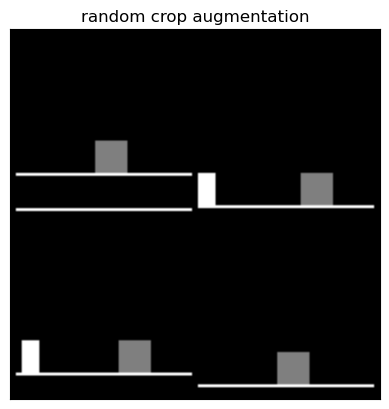

In [41]:
aug_frames = augmentations.random_crop(frames,50)
show_imgs(aug_frames, title="random crop augmentation", max_display=4)

assert aug_frames.shape == frames.shape, "Shapes should not change by image transformation!"
assert aug_frames.device == frames.device, "Device should not change by image transformation!" 
assert aug_frames.min() >= 0 and aug_frames.max() <= 1, "Invalid range for pixel values"

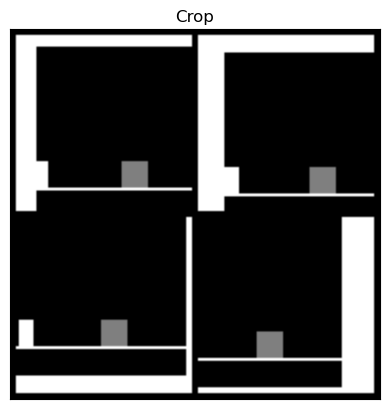

In [42]:
aug_frames = augmentations.random_crop2(frames, padding=10)
show_imgs(aug_frames, title="Crop", max_display=4)

assert aug_frames.shape == frames.shape, "Shapes should not change by image transformation!"
assert aug_frames.device == frames.device, "Device should not change by image transformation!" 
assert aug_frames.min() >= 0 and aug_frames.max() <= 1, "Invalid range for pixel values"

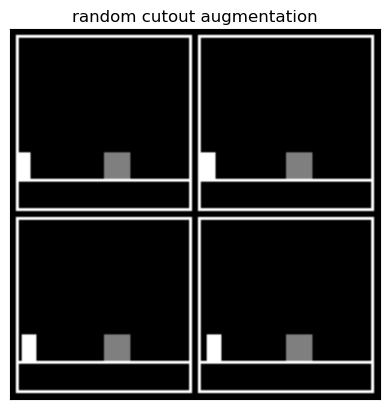

In [43]:
aug_frames = augmentations.random_cutout(frames,10,25)
show_imgs(aug_frames, title="random cutout augmentation", max_display=4)

assert aug_frames.shape == frames.shape, "Shapes should not change by image transformation!"
assert aug_frames.device == frames.device, "Device should not change by image transformation!" 
assert aug_frames.min() >= 0 and aug_frames.max() <= 1, "Invalid range for pixel values"

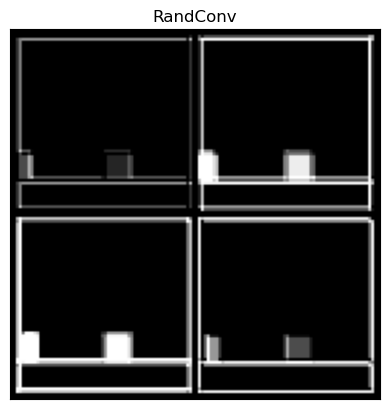

In [44]:
aug_frames = augmentations.rand_conv(frames)
show_imgs(aug_frames, title="RandConv", max_display=4)

assert aug_frames.shape == frames.shape, "Shapes should not change by image transformation!"
assert aug_frames.device == frames.device, "Device should not change by image transformation!" 
assert aug_frames.min() >= 0 and aug_frames.max() <= 1, "Invalid range for pixel values"

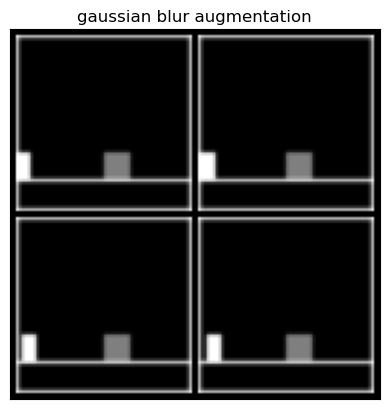

In [45]:
aug_frames = augmentations.gaussian_blur(frames, kernel_size=3, sigma=0.6)
show_imgs(aug_frames, title="gaussian blur augmentation", max_display=4)

assert aug_frames.shape == frames.shape, "Shapes should not change by image transformation!"
assert aug_frames.device == frames.device, "Device should not change by image transformation!" 
assert aug_frames.min() >= 0 and aug_frames.max() <= 1, "Invalid range for pixel values"

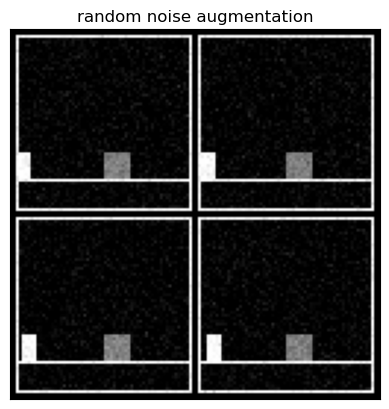

In [46]:
aug_frames = augmentations.random_noise(frames)
show_imgs(aug_frames, title="random noise augmentation", max_display=4)

assert aug_frames.shape == frames.shape, "Shapes should not change by image transformation!"
assert aug_frames.device == frames.device, "Device should not change by image transformation!" 
assert aug_frames.min() >= 0 and aug_frames.max() <= 1, "Invalid range for pixel values"

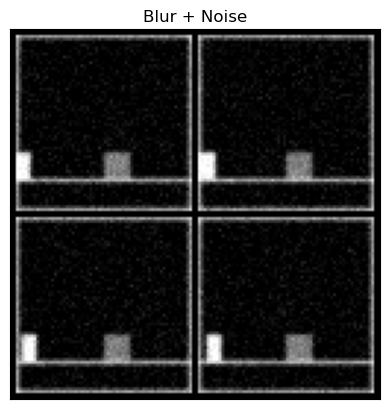

In [47]:
aug_frames = augmentations.blur_and_noise(frames)
show_imgs(aug_frames, title="Blur + Noise", max_display=4)

assert aug_frames.shape == frames.shape, "Shapes should not change by image transformation!"
assert aug_frames.device == frames.device, "Device should not change by image transformation!" 
assert aug_frames.min() >= 0 and aug_frames.max() <= 1, "Invalid range for pixel values"